Here are a few use cases for this project:

Gardening Applications: The "flowers_segmentation" model could be used in gardening applications. Users could take photos of flowers they are interested in to identify the species and learn more about how to plant and care for them.

Biodiversity Studies: Researchers studying biodiversity in particular areas could use this model to help identify and catalogue flower species in various ecosystems.

Educational Purposes: The model could be used in educational settings, for example in a botany or biology class, where students need to identify and learn about different types of flowers.

Commercial Nursery: Nurseries can use this model to catalog their stock and help customers select plants. It could also help employees identify flowers that come without labels or have lost them.

Art Inspiration: Artists might use this model to identify flowers in their environment to learn their names and details, which could provide inspiration for creative works. This might be particularly useful for botanical illustrators or other artists who often work with floral themes.

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mztMH4jfnVFlxWjJJxWk")
project = rf.workspace("flowersdetection").project("flowers_segmentation")
dataset = project.version(17).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to flowers_segmentation-17 in yolov8:: 100%|██████████| 18265/18265 [00:03<00:00, 4603.68it/s]


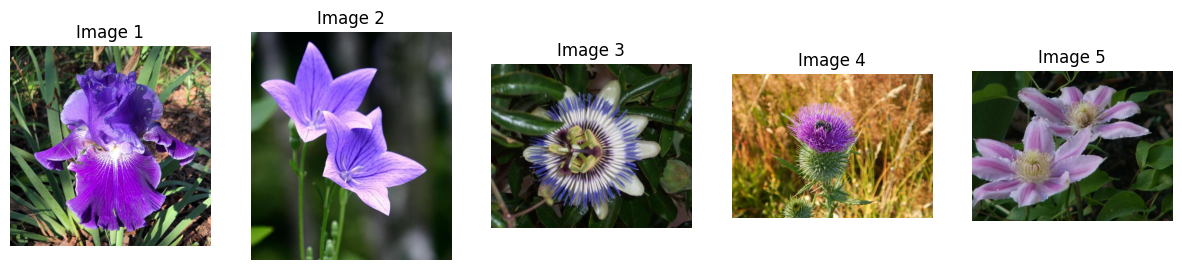

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Directory where your training images are located
data_dir = '/content/flowers_segmentation-17/train/images'

# List all files in the directory
image_files = os.listdir(data_dir)

# Select 5 random images
random_images = random.sample(image_files, 5)

# Set up a 2x3 grid for displaying the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Loop through and display the selected images
for i, image_file in enumerate(random_images):
    image_path = os.path.join(data_dir, image_file)
    image = imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')

plt.show()

In [3]:
# now install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 11.1 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.8/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display,Image

In [6]:
# Now Train The YOLOv8 model on your custom data
!yolo task=segment mode=train model=yolov8s-seg.pt data= /content/flowers_segmentation-17/data.yaml epochs=50 imgsz=416 plots=True

100% 22.8M/22.8M [00:00<00:00, 193MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/flowers_segmentation-17/data.yaml, epochs=50, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

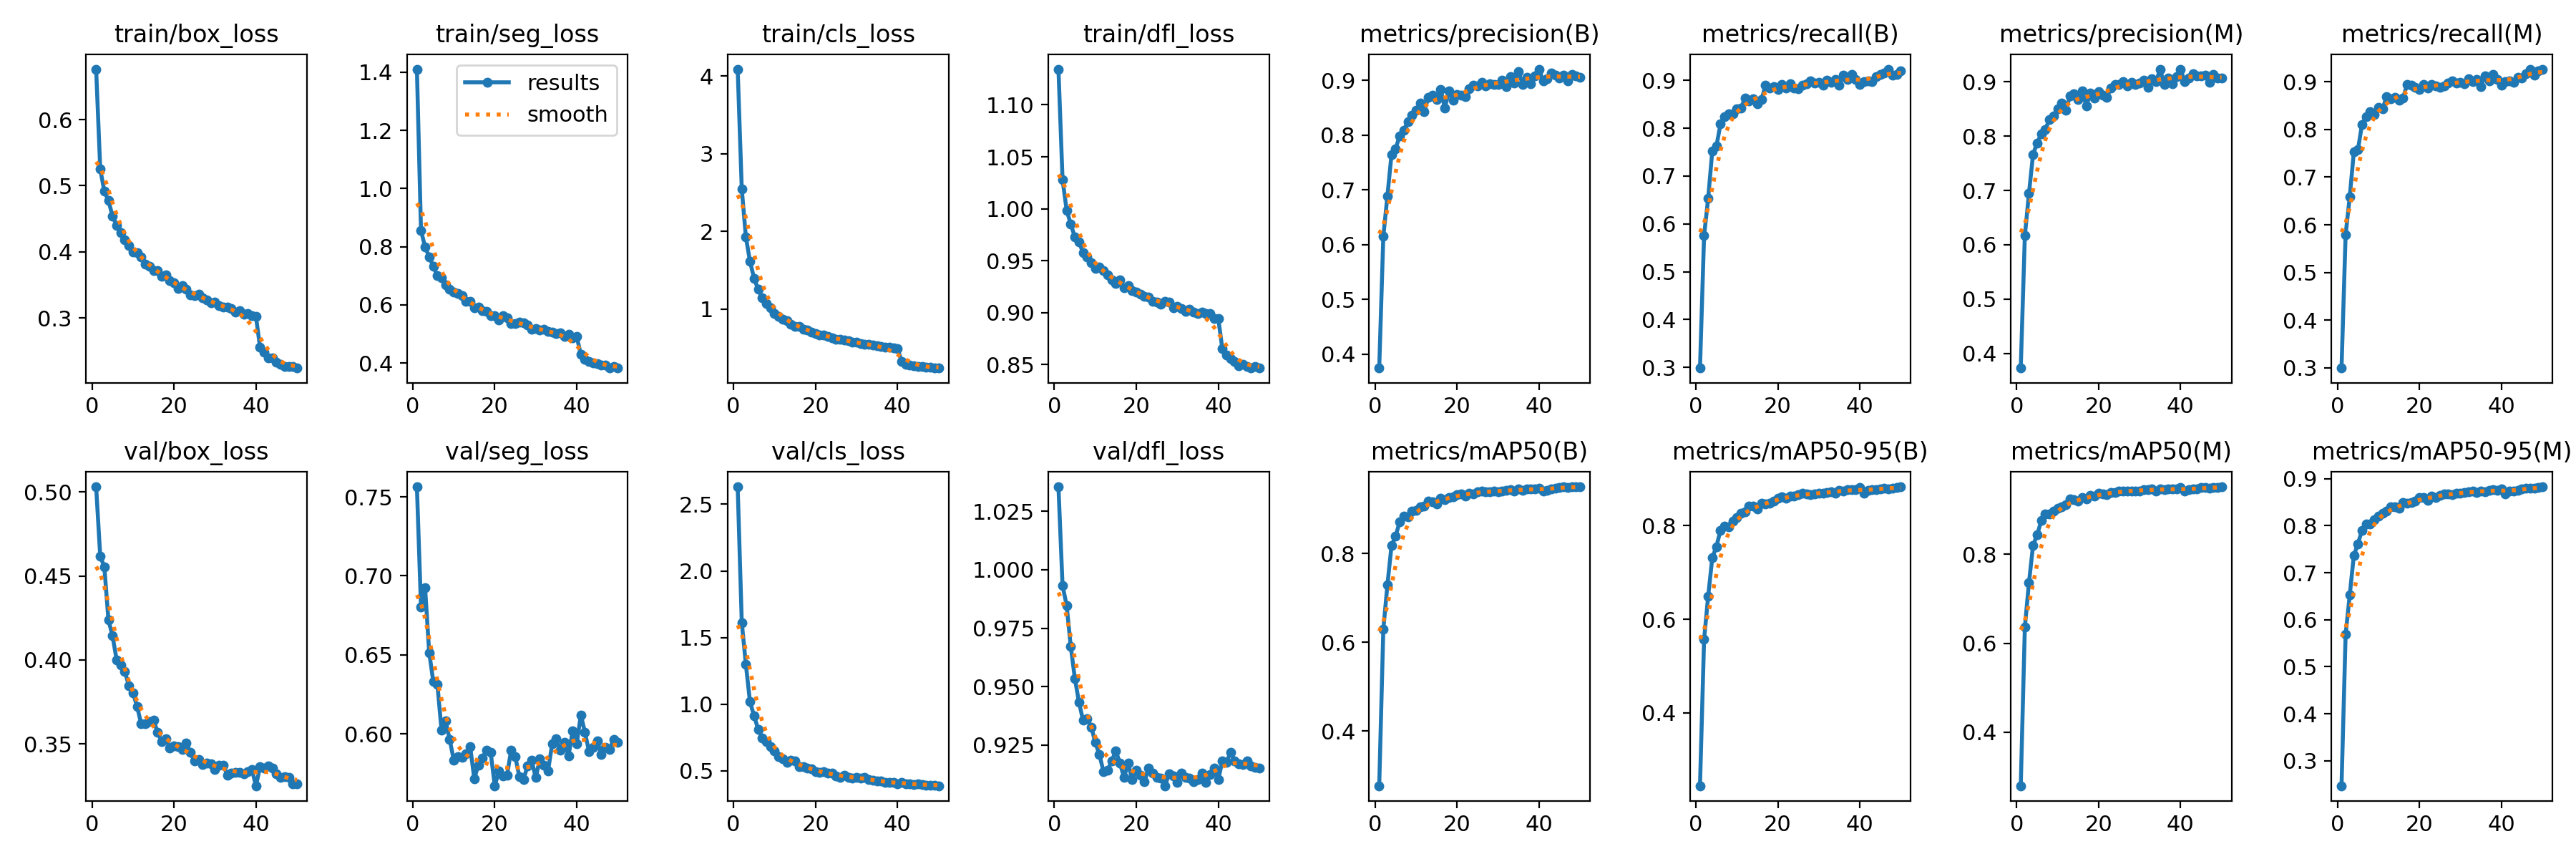

In [9]:
Image(filename="/content/runs/segment/train/results.png",width=600)


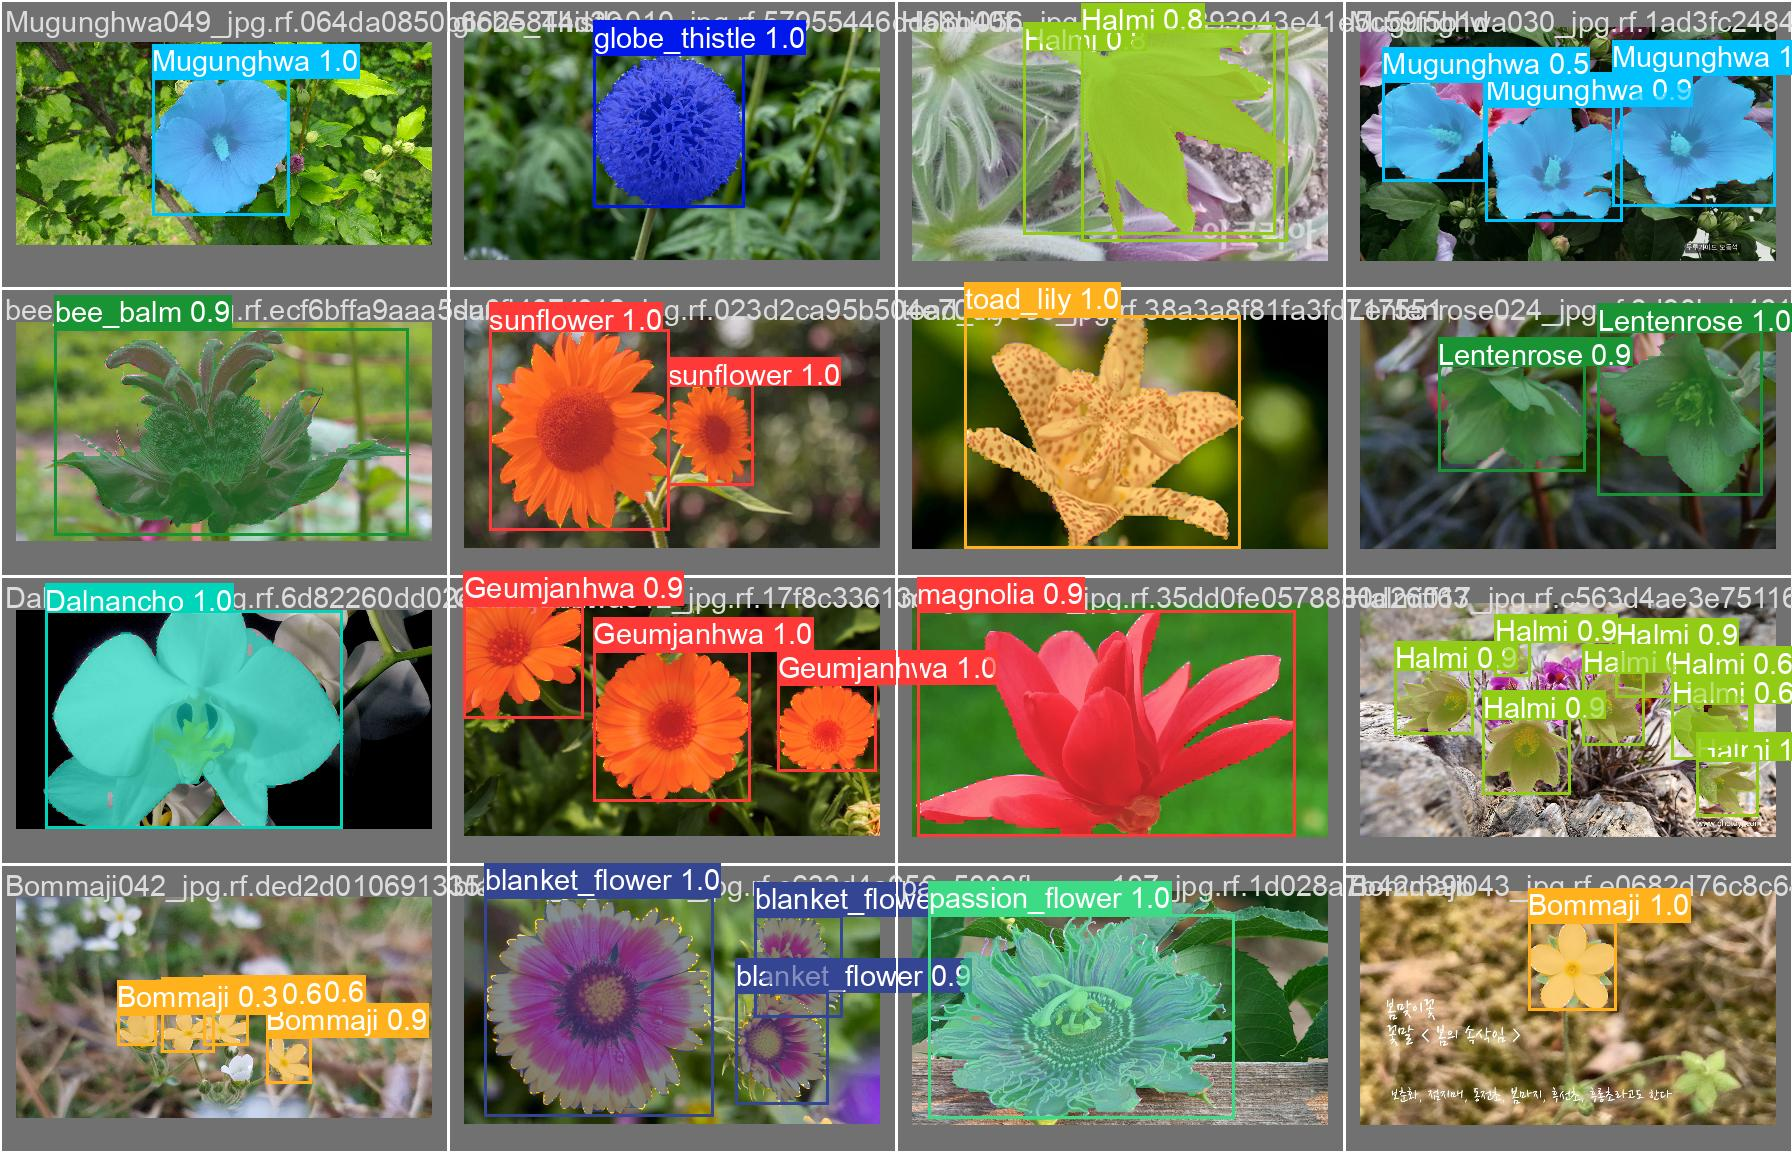

In [10]:
#prediction batchs of yolov8
Image(filename="/content/runs/segment/train/val_batch0_pred.jpg",width=600)

In [23]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt data= /content/flowers_segmentation-17/data.yaml conf=0.50 source= /content/ppp.jpeg

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11822557 parameters, 0 gradients, 42.7 GFLOPs

image 1/1 /content/ppp.jpeg: 320x416 1 hibiscus, 80.8ms
Speed: 2.1ms preprocess, 80.8ms inference, 79.4ms postprocess per image at shape (1, 3, 320, 416)
Results saved to runs/segment/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


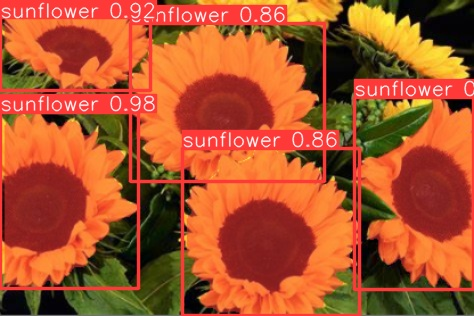

In [16]:
#prediction batchs of yolov8
Image(filename="/content/runs/segment/predict2/OIP.jpeg",width=600)

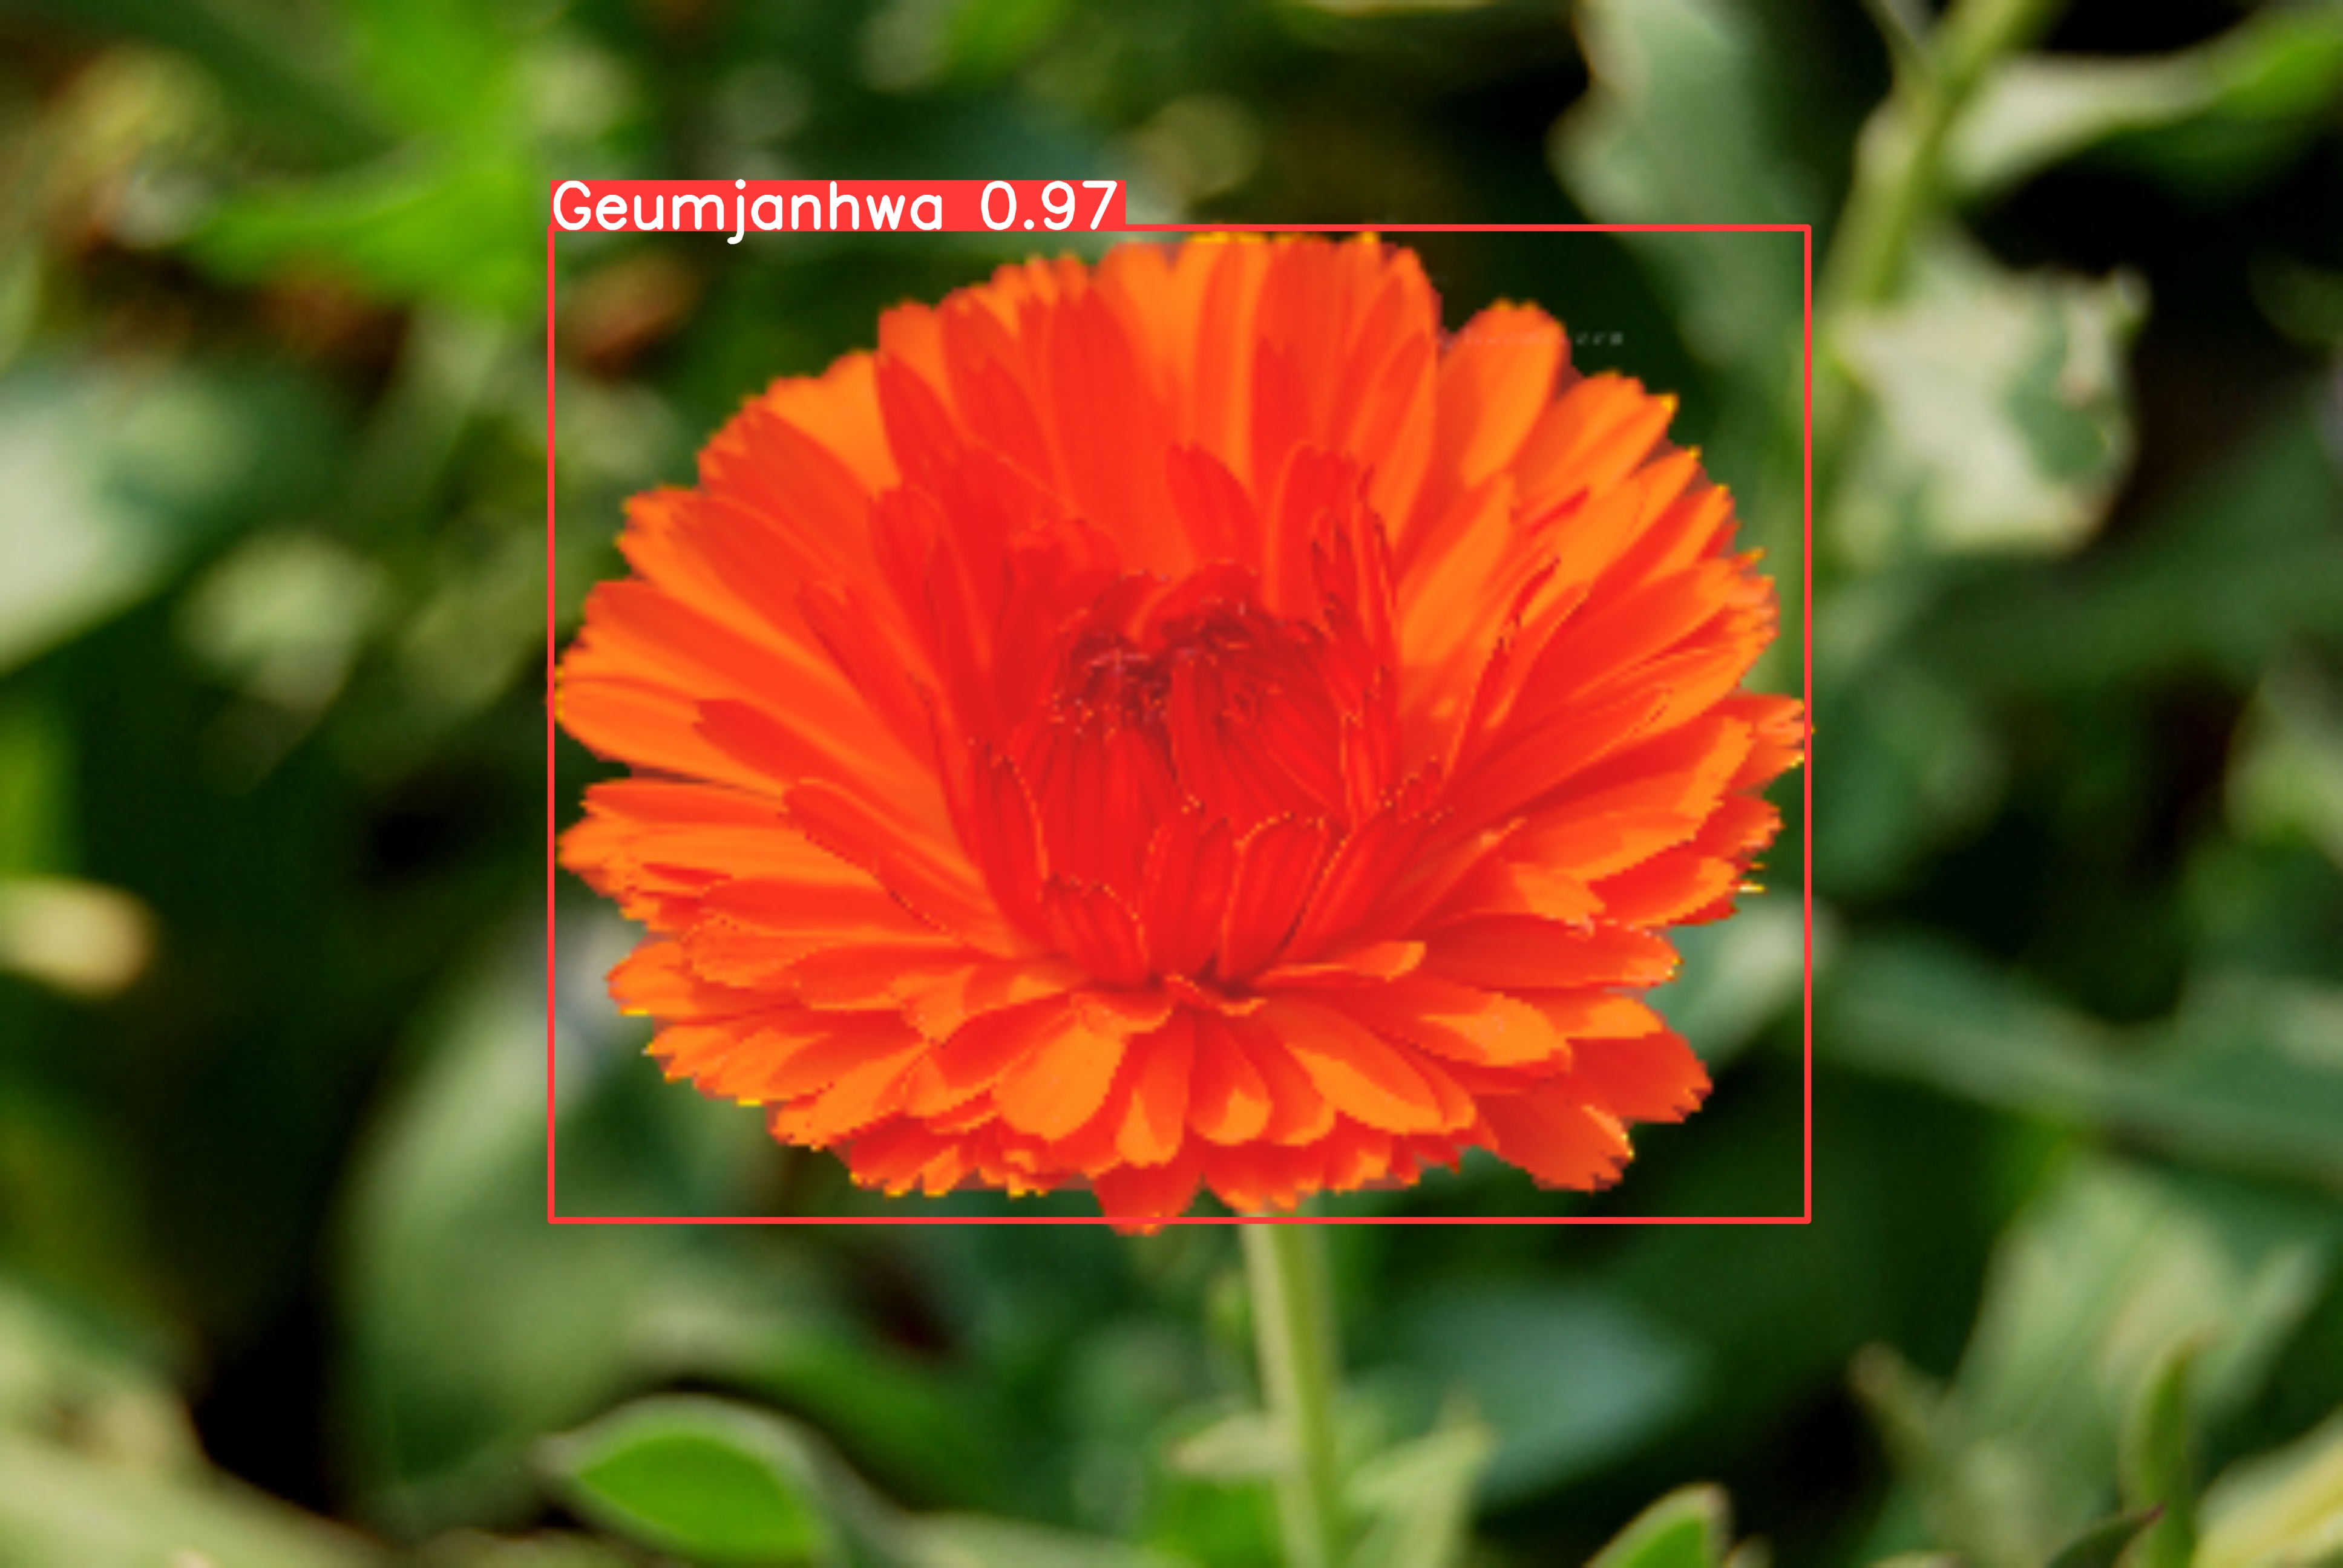

In [19]:
#prediction batchs of yolov8
Image(filename="/content/runs/segment/predict4/calendula-officinalis-picture.jpg",width=600)

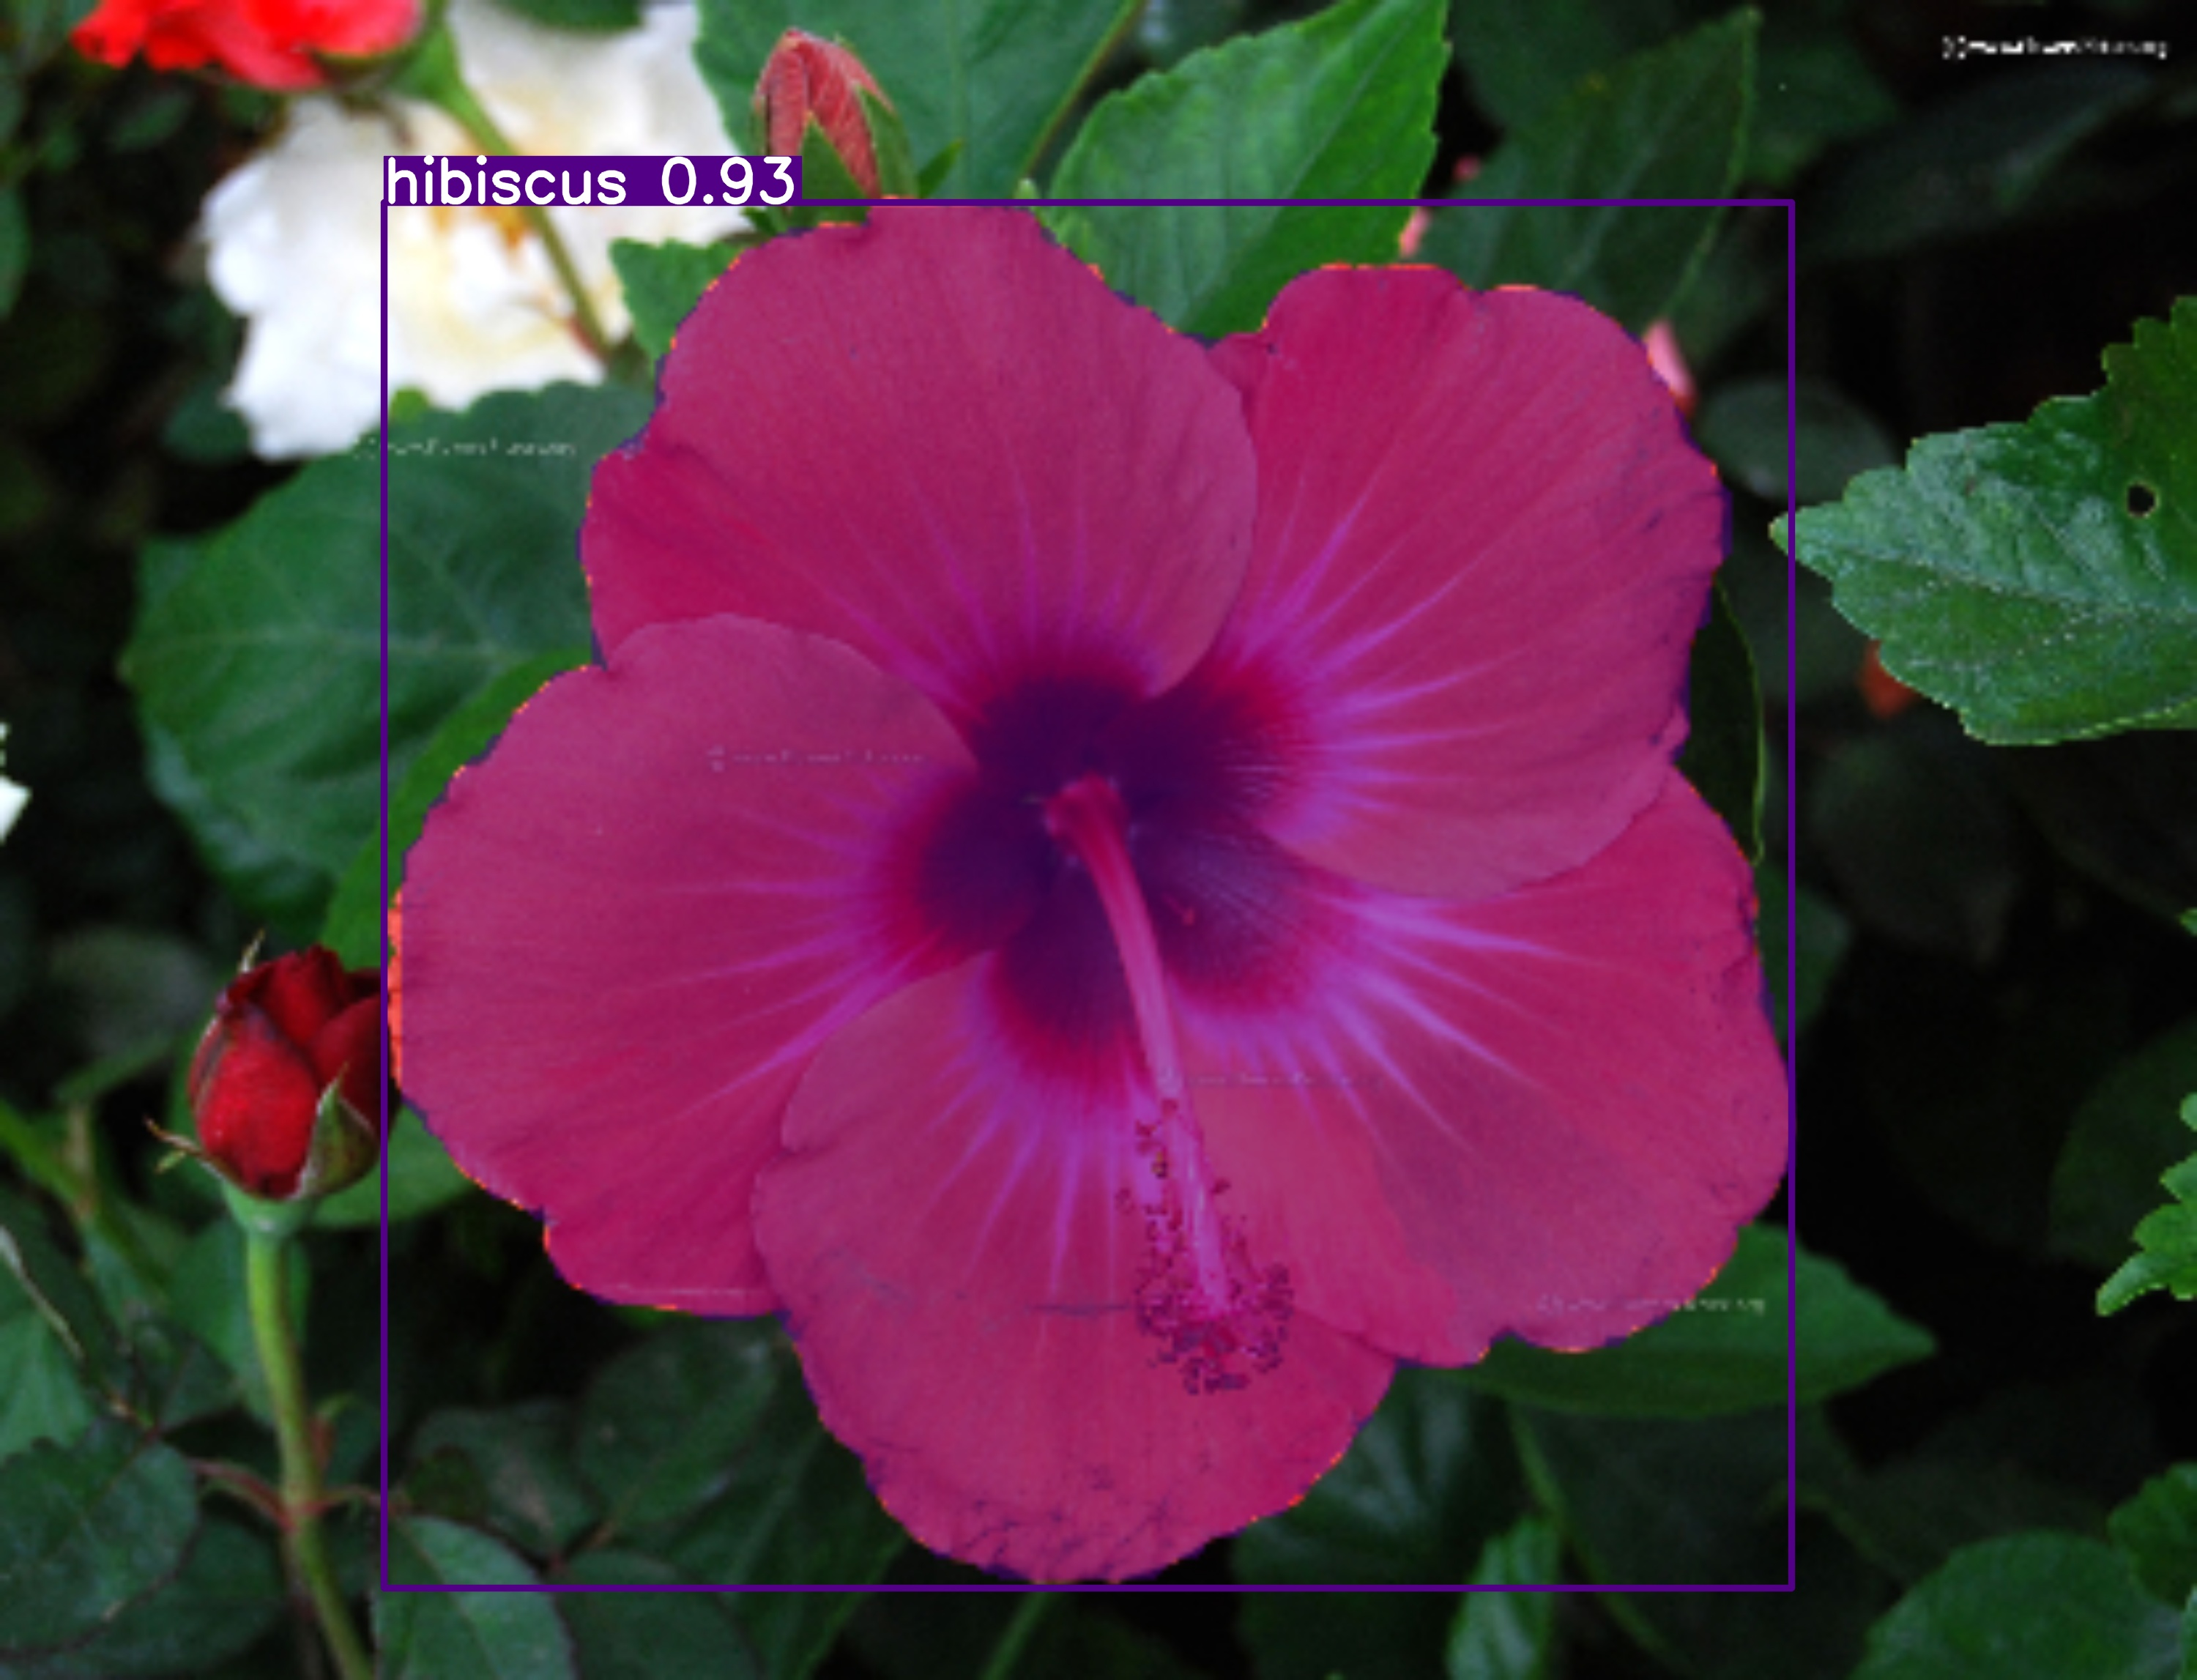

In [24]:
#prediction batchs of yolov8
Image(filename="/content/runs/segment/predict6/ppp.jpeg",width=600)